In [1]:
!pip install yfinance==0.1.67
!mamba install bs4==4.10.0 -y
!pip install nbformat==4.2.0


                  __    __    __    __
                 /  \  /  \  /  \  /  \
                /    \/    \/    \/    \
███████████████/  /██/  /██/  /██/  /████████████████████████
              /  / \   / \   / \   / \  \____
             /  /   \_/   \_/   \_/   \    o \__,
            / _/                       \_____/  `
            |/
        ███╗   ███╗ █████╗ ███╗   ███╗██████╗  █████╗
        ████╗ ████║██╔══██╗████╗ ████║██╔══██╗██╔══██╗
        ██╔████╔██║███████║██╔████╔██║██████╔╝███████║
        ██║╚██╔╝██║██╔══██║██║╚██╔╝██║██╔══██╗██╔══██║
        ██║ ╚═╝ ██║██║  ██║██║ ╚═╝ ██║██████╔╝██║  ██║
        ╚═╝     ╚═╝╚═╝  ╚═╝╚═╝     ╚═╝╚═════╝ ╚═╝  ╚═╝

        mamba (1.4.2) supported by @QuantStack

        GitHub:  https://github.com/mamba-org/mamba
        Twitter: https://twitter.com/QuantStack

█████████████████████████████████████████████████████████████


Looking for: ['bs4==4.10.0']

[+] 0.0s
[+] 0.1s
pkgs/main/linux-64 ━━━━━━━━━━╸━━━━━━━━━━━━━━   0.0 B /  ??.?MB @ 

In [3]:
import yfinance as yf
import pandas as pd
import requests
from bs4 import BeautifulSoup
import plotly.graph_objects as go
from plotly.subplots import make_subplots

###### Ignore or filter specific warning messages:

In [ ]:
import warnings
# Ignore all warnings
warnings.filterwarnings("ignore", category=FutureWarning)

#### Use yfinance to extract the data:

In [5]:
tesla=yf.Ticker("TSLA")

In [6]:
tesla_data = tesla.history(period="max")
tesla_data

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2010-06-29,1.266667,1.666667,1.169333,1.592667,281494500,0,0.0
2010-06-30,1.719333,2.028000,1.553333,1.588667,257806500,0,0.0
2010-07-01,1.666667,1.728000,1.351333,1.464000,123282000,0,0.0
2010-07-02,1.533333,1.540000,1.247333,1.280000,77097000,0,0.0
2010-07-06,1.333333,1.333333,1.055333,1.074000,103003500,0,0.0
...,...,...,...,...,...,...,...
2023-11-10,210.029999,215.380005,205.690002,214.649994,130994000,0,0.0
2023-11-13,215.600006,225.399994,211.610001,223.710007,140447600,0,0.0
2023-11-14,235.029999,238.139999,230.720001,237.410004,149771600,0,0.0


In [7]:
tesla_data.reset_index(inplace=True)
tesla_data.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2010-06-29,1.266667,1.666667,1.169333,1.592667,281494500,0,0.0
1,2010-06-30,1.719333,2.028000,1.553333,1.588667,257806500,0,0.0
2,2010-07-01,1.666667,1.728000,1.351333,1.464000,123282000,0,0.0
3,2010-07-02,1.533333,1.540000,1.247333,1.280000,77097000,0,0.0
4,2010-07-06,1.333333,1.333333,1.055333,1.074000,103003500,0,0.0


### Use Webscrapping to Extract Tesla Revenue Data

In [8]:
url='https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/revenue.htm'
html_data = requests.get(url).text

In [9]:
beautiful_soup = BeautifulSoup(html_data)

In [10]:
read_html_pandas_data = pd.read_html(str(beautiful_soup))
tesla_revenue = read_html_pandas_data[0]
tesla_revenue.head()

,Tesla Annual Revenue(Millions of US $),Tesla Annual Revenue(Millions of US $).1
0,2021,"$53,823"
1,2020,"$31,536"
2,2019,"$24,578"
3,2018,"$21,461"
4,2017,"$11,759"


###### Remove the comma and dollar sign from revenue column:

In [11]:
tesla_revenue["Tesla Annual Revenue(Millions of US $).1"] = tesla_revenue['Tesla Annual Revenue(Millions of US $).1'].str.replace(',|\$',"")

In [12]:
tesla_revenue.dropna(inplace=True)

tesla_revenue = tesla_revenue[tesla_revenue['Tesla Annual Revenue(Millions of US $).1'] != ""]

### Plot Tesla Stock graph

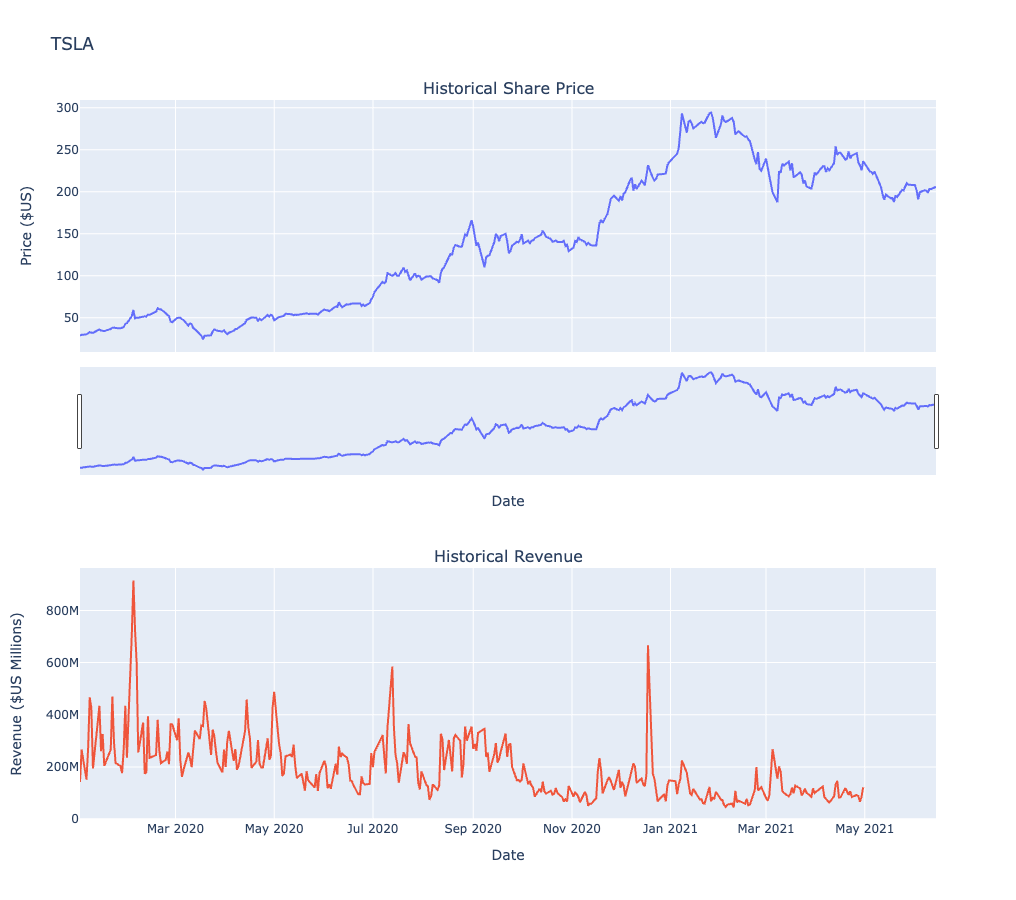

In [14]:
stock_data = yf.download("TSLA", start="2020-01-01", end="2021-09-30", progress=False)
revenue_data = yf.download("TSLA", start="2020-01-01", end="2021-09-30", progress=False)
stock_data.reset_index(inplace=True)
revenue_data.reset_index(inplace=True)

def make_graph(stock_data, revenue_data, stock):
    fig = make_subplots(rows=2, cols=1, 
                        shared_xaxes=True, 
                        subplot_titles=("Historical Share Price", "Historical Revenue"), 
                        vertical_spacing=.3)
    
    stock_data_specific = stock_data[stock_data.Date <= '2021-06-14']
    revenue_data_specific = revenue_data[revenue_data.Date <= '2021-04-30']
    
    fig.add_trace(go.Scatter(
        x=pd.to_datetime(stock_data_specific.Date, infer_datetime_format=True),
        y=stock_data_specific.Close.astype("float"), name="Share Price"), row=1, col=1)
    
    fig.add_trace(go.Scatter(x=pd.to_datetime(revenue_data_specific.Date, infer_datetime_format=True), 
                             y=revenue_data_specific.Volume.astype("float"),
                             name="Volume"), row=2, col=1)
    
    fig.update_xaxes(title_text="Date", row=1, col=1)
    fig.update_xaxes(title_text="Date", row=2, col=1)
    fig.update_yaxes(title_text="Price ($US)", row=1, col=1)
    fig.update_yaxes(title_text="Revenue ($US Millions)", row=2, col=1)
    
    fig.update_layout(showlegend=False,
                      height=900,
                      title=stock,
                      xaxis_rangeslider_visible=True)
    
    fig.show()
    
make_graph(stock_data, revenue_data, 'TSLA')